In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [299]:
sales_data = pd.read_csv("sales_data.csv")
sales_data

,year,month,sales,revenue,profit,loss
0,2025,January,700,1400000,360000,0.0
1,2025,February,660,1320000,0,55000.0
2,2025,March,760,1520000,410000,0.0
3,2025,April,690,1380000,330000,0.0
4,2025,May,650,1300000,0,70000.0
5,2025,June,780,1560000,440000,0.0
6,2025,July,820,1640000,470000,0.0
7,2025,August,860,1720000,510000,0.0
8,2025,September,900,1800000,550000,0.0
9,2025,October,940,1880000,590000,0.0


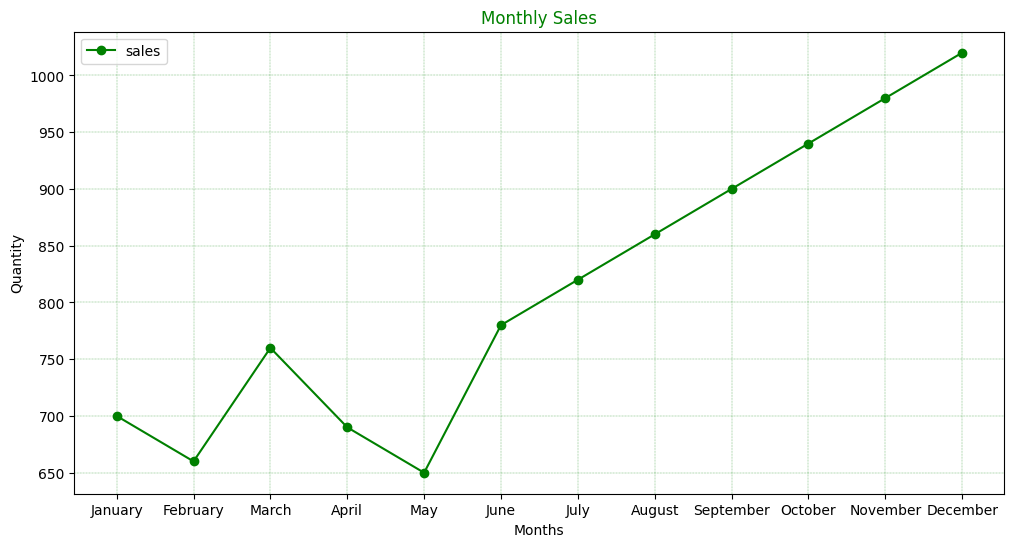

In [300]:
# Monthly sales data
plt.figure(figsize=(12,6))
plt.plot(sales_data['month'], sales_data['sales'], 'o-g', label = 'sales')
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.title("Monthly Sales", color = 'g')
plt.grid(color = 'g', ls = '-.', linewidth = '0.2')
plt.legend()
plt.show()

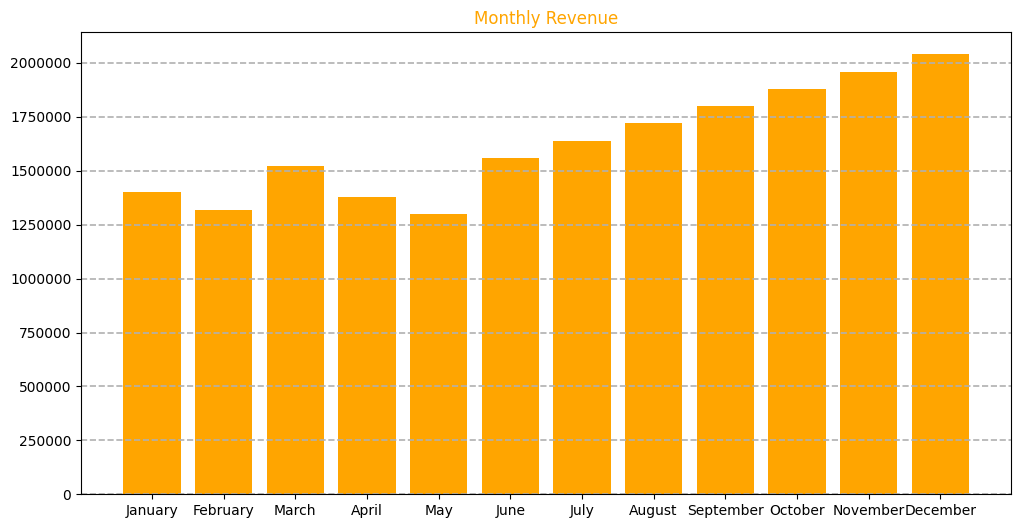

In [301]:
# Monthly Revenue data
plt.figure(figsize=(12,6))
plt.bar(sales_data['month'], sales_data['revenue'], color = 'orange')
plt.title("Monthly Revenue", color = 'orange')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', ls ='--', linewidth = '1.2')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

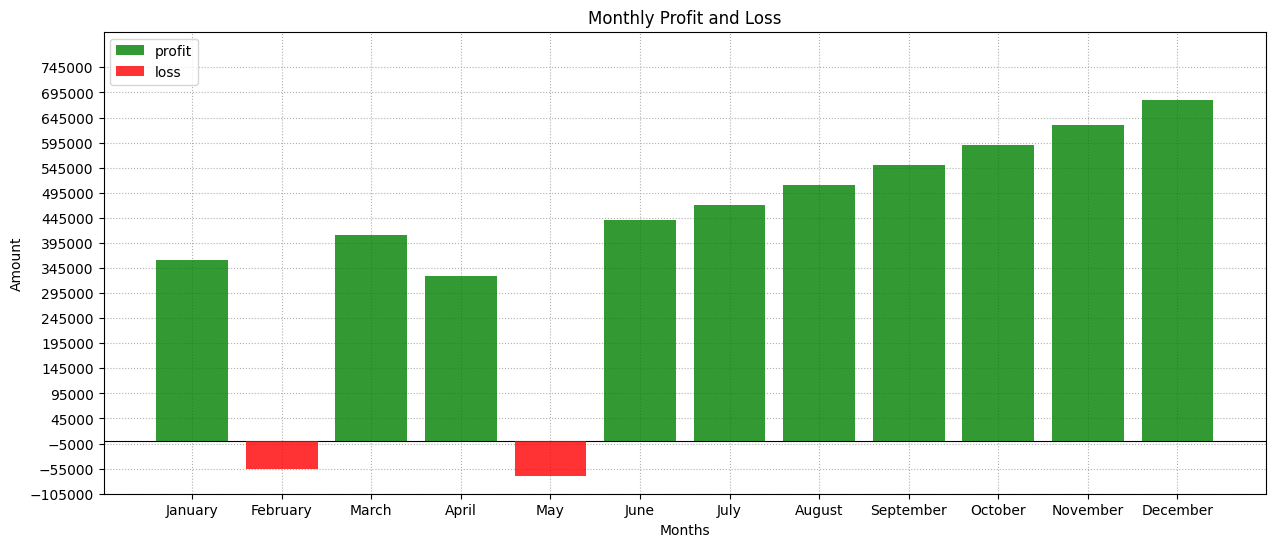

In [302]:
# Monthly profit-loss data
plt.figure(figsize=(15,6))
negative_loss = -sales_data['loss']
max_profit = sales_data['profit'].max()
max_loss = abs(negative_loss.min())
plt.bar(sales_data['month'],
        sales_data['profit'],
        alpha = 0.8,
        label = 'profit', 
        color = 'green',
        zorder = 3,
        )
plt.bar(sales_data['month'], 
        negative_loss, 
        label = 'loss', 
        alpha = 0.8,
        color = 'red',
        zorder = 3,
        )
plt.axhline(0, color='black', linewidth=0.8)
plt.ylim(-max_loss*1.2, max_profit*1.2)
yticks = np.arange(-max_loss*1.5, max_profit*1.1, 50000)
plt.yticks(yticks)
plt.xlabel("Months")
plt.ylabel("Amount")
plt.title("Monthly Profit and Loss")
plt.legend()
plt.grid(linestyle = ':')
plt.show

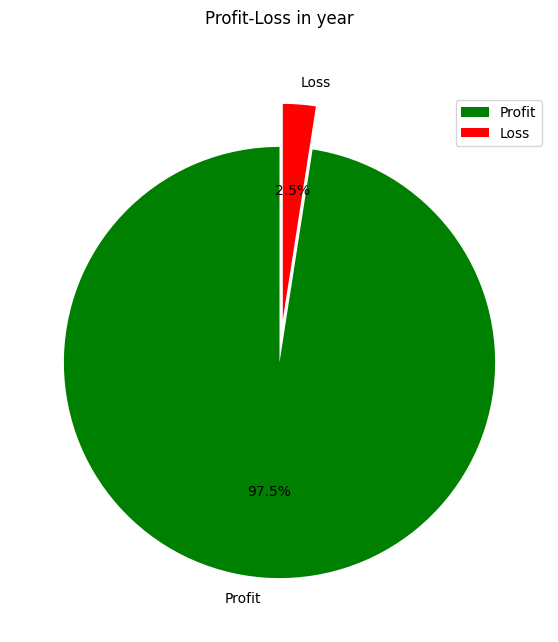

In [303]:
# Yearly profit-loss data
plt.figure(figsize=(7,7))
total_profit = sales_data['profit'].sum()
total_loss = sales_data['loss'].sum()
labels = ['Profit','Loss']
wedge_colors = ['green','red']
data = [total_profit, total_loss]
exp = [0,0.2]
plt.pie(data, 
        colors=wedge_colors, 
        labels=labels, 
        startangle=90, 
        autopct='%1.1f%%', 
        explode=exp
        )
plt.title("Profit-Loss in year", pad = 50)
plt.legend()
plt.show()


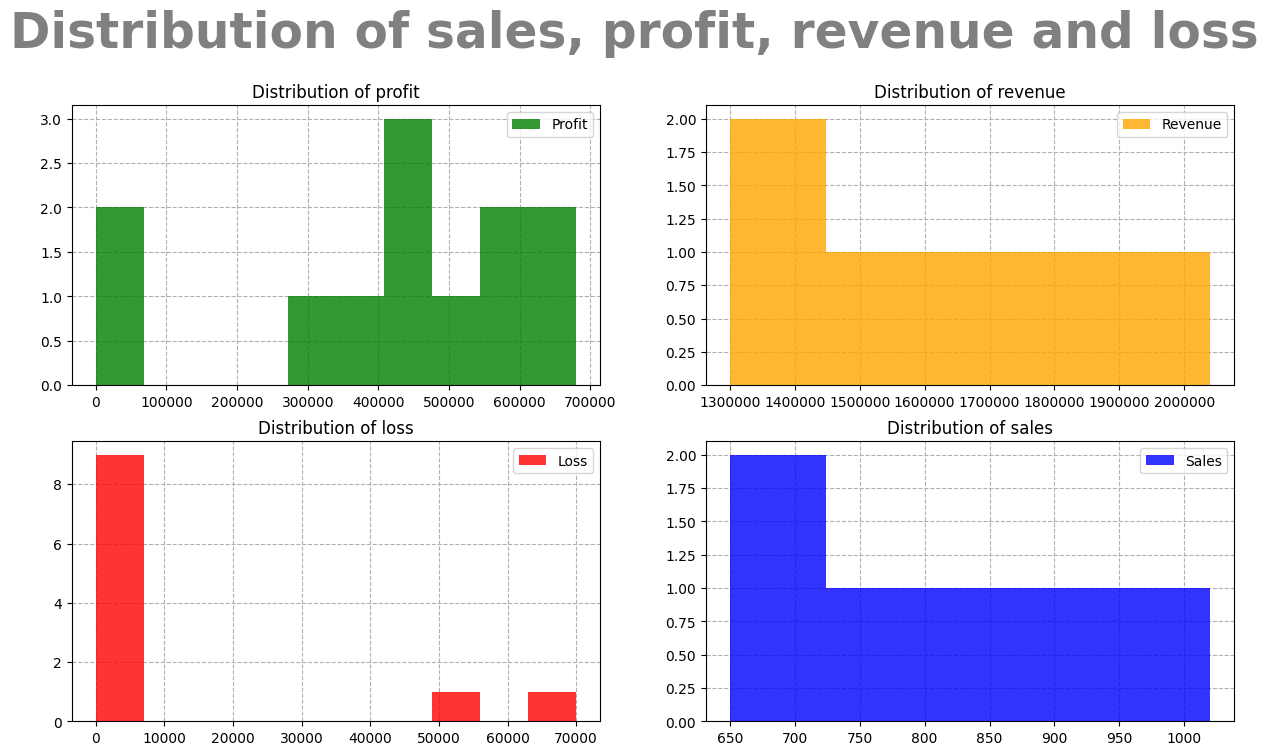

In [304]:
# Distribution of sales, profit, revenue and loss
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.hist(sales_data['profit'], 
         bins=10, 
         label='Profit',
         alpha=0.8, 
         color='green',
         zorder = 2
         )
plt.title("Distribution of profit")
plt.legend()
plt.grid(ls = '--')
plt.plot()

plt.subplot(2,2,2)
plt.hist(sales_data['revenue'],
         bins=10,
         label='Revenue',
         alpha=0.8, 
         color='orange',
         zorder = 2
         )
plt.title("Distribution of revenue")
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.grid(ls = '--')
plt.plot()

plt.subplot(2,2,3)
plt.hist(sales_data['loss'],
         bins=10, 
         label='Loss',
         alpha=0.8, 
         color='red',
         zorder = 2
         )
plt.title("Distribution of loss")
plt.legend()
plt.grid(ls = '--')
plt.plot()

plt.subplot(2,2,4)
plt.hist(sales_data['sales'], 
         bins=10, 
         label='Sales', 
         alpha=0.8, 
         color='blue', 
         zorder = 2)
plt.title("Distribution of sales", )
plt.legend()
plt.grid(ls = '--')
plt.plot()

plt.suptitle("Distribution of sales, profit, revenue and loss",y=1, fontsize=35, fontweight='bold', color='Grey')
plt.show()

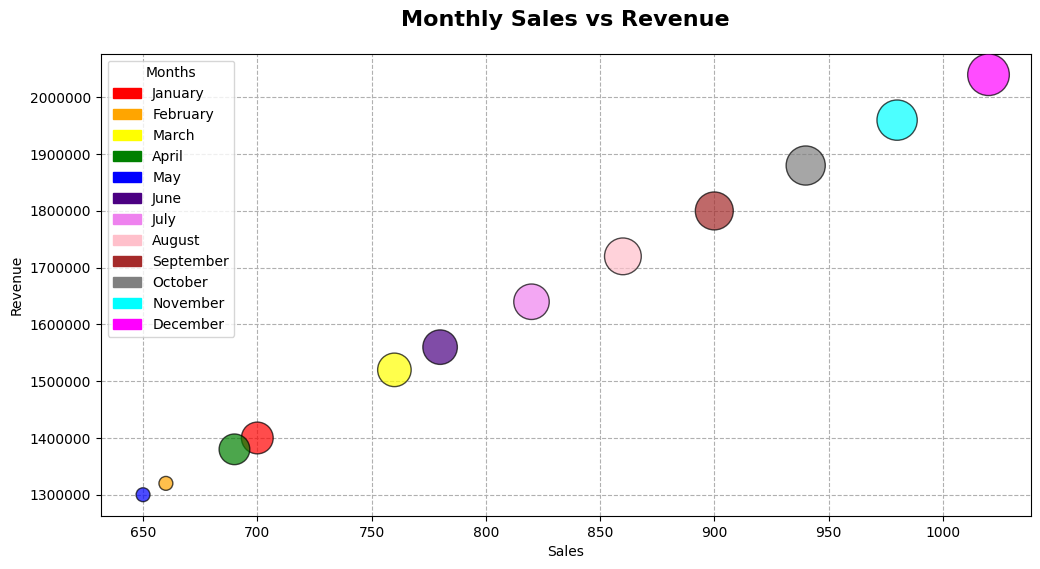

In [308]:
# Monthly sales and revenue comparision
import matplotlib.patches as mpatches
month_colors = {
    'January': 'red',
    'February': 'orange',
    'March': 'yellow',
    'April': 'green',
    'May': 'blue',
    'June': 'indigo',
    'July': 'violet',
    'August': 'pink',
    'September': 'brown',
    'October': 'grey',
    'November': 'cyan',
    'December': 'magenta'
}

legend_items = [
    mpatches.Patch(color=color, label=month)
    for month, color in month_colors.items()
]
plt.figure(figsize=(12,6))
marker_size = 100 + sales_data['profit'] / sales_data['profit'].max() * 800
plt.scatter(sales_data["sales"],
            sales_data["revenue"],
            c=sales_data["month"].map(month_colors),
            s=marker_size,
            alpha=0.7,
            edgecolors='black',
            zorder=3
            )
plt.title("Monthly Sales vs Revenue", fontsize = 16, fontweight = "bold",  color='black', pad = 20)
plt.xlabel("Sales")
plt.ylabel("Revenue")
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.legend(handles = legend_items,
           title = "Months",
           )
plt.grid(linestyle='--', zorder=0)
plt.show()
